<a href="https://colab.research.google.com/github/SONG-0502/1st-pap/blob/main/ML_SONG_Tianxia_GS71639.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall xgboost -y
!pip uninstall sklearn -y

1. Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Loading and Inspecting the Data

In [3]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [4]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [6]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
# Converting the 'Date' columns to datetime format
features['Date'] = pd.to_datetime(features['Date'], format='%d/%m/%Y') # Specify the correct format
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y') # Assuming 'sales' also uses the same format

# Previewing the first few rows of the 'features' dataset
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


3. Merging the DataFrames


In [8]:
df = pd.merge(sales, features, on = ['Store', 'Date', 'IsHoliday'])
df = pd.merge(df, stores, on = ['Store'], how = 'left')

<Axes: >

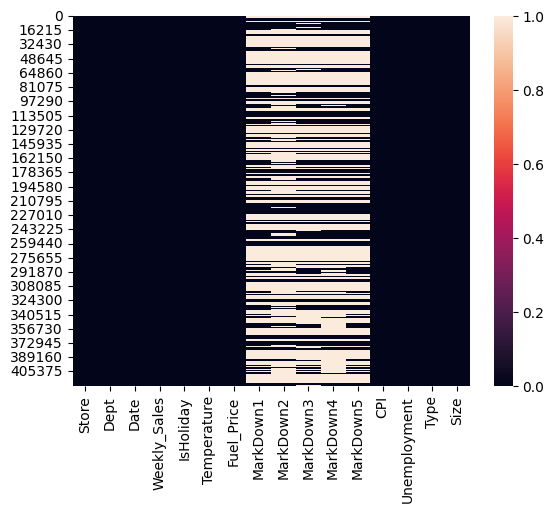

In [9]:
sns.heatmap(df.isnull())

4. Processing the Date Column


In [10]:
df[['year','month','day']] = df.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
df.drop(['year', 'day', 'Date'], axis=1, inplace=True)
df.fillna(0, inplace=True)

# Checking for null values
df.isnull().sum()

,0
Store,0
Dept,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0
MarkDown4,0


5. Converting Holidays and Month to Numeric

In [11]:
df['month'] = df['month'].astype(str).astype(int)
df.IsHoliday = df.IsHoliday.replace({False: 0, True: 1})

<ipython-input-11-aa6f99e1a37d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.IsHoliday = df.IsHoliday.replace({False: 0, True: 1})


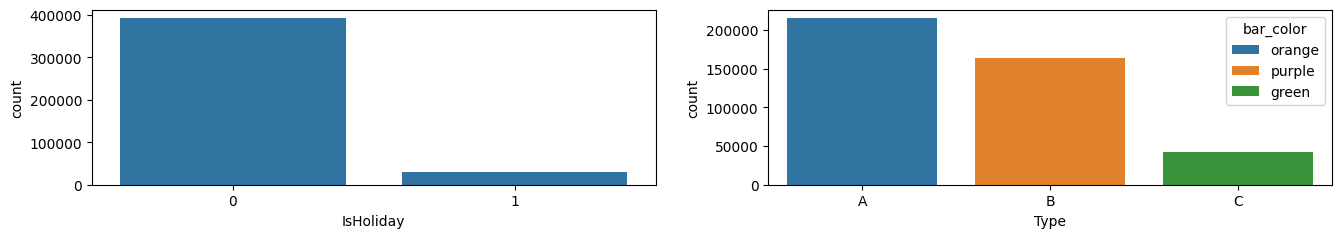

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 按 IsHoliday 分组统计数量
holiday_counts = df.groupby('IsHoliday').size().reset_index(name='count')
# 按 Type 分组统计数量
type_counts = df.groupby('Type').size().reset_index(name='count')

# Instead of relying on a non-existent 'special_flag' column,
# directly assign colors based on 'Type'
type_counts['bar_color'] = type_counts['Type'].map({'A': 'orange', 'B': 'purple', 'C': 'green'}) # Example mapping, adjust as needed

fig = plt.figure(figsize=(16, 5))
fig.add_subplot(2, 2, 1)
sns.barplot(x='IsHoliday', y='count', data=holiday_counts)

fig.add_subplot(2, 2, 2)
# 使用hue参数基于'bar_color'列来设置不同颜色
sns.barplot(x='Type', y='count', data=type_counts, hue='bar_color', dodge=False) # Use the new 'bar_color' column
plt.show()

6. Preparing the Target Variable and Final Dataset

In [13]:
df_target = df['Weekly_Sales']
df_final = df.drop(['Weekly_Sales'], axis=1)

# One-hot encoding
df_final = pd.get_dummies(df_final, columns=['Store', 'Dept', 'Type'], drop_first=True)

# Check for null values again
df_final.isnull().sum()



,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
...,...
Dept_97,0
Dept_98,0
Dept_99,0
Type_B,0


7. Splitting the Data into Train, Test, and Validation Sets


In [14]:
!pip install xgboost==1.7.6
!pip install scikit-learn==1.2.2
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Further splitting the test set into validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

# Display the shapes of the datasets
print('Shape of X_test = ', X_test.shape,  '\nShape of y_test =', y_test.shape)
print('Shape of X_train = ', X_train.shape,  '\nShape of y_train =', y_train.shape)
print('Shape of X_val = ', X_val.shape,  '\nShape of y_val =', y_val.shape)


  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)
Shape of X_test =  (31618, 138) 
Shape of y_test = (31618,)
Shape of X_train =  (358334, 138) 
Shape of y_train = (358334,)
Shape of X_val =  (31618, 138) 
Shape of y_val = (31618,)


8. Training the XGBoost Model


In [15]:
#!pip install xgboost==1.7.6
#!pip install scikit-learn==1.2.2
#import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.2, max_depth = 10, n_estimators = 100)
model.fit(X_train, y_train) # Pass X_train and y_train directly

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

9. Making Predictions


In [16]:
y_predict = model.predict(X_test)

result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9443750240271963


10. Calculating Model Metrics


In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 5359.608 
MSE = 28725396.0 
MAE = 2832.84 
R2 = 0.9443750240271963 
Adjusted R2 = 0.9441311710876414


11. Setting Up Arize for Monitoring


In [18]:
!pip install arize

In [19]:
from arize.pandas.logger import Client, Schema

In [20]:
API_KEY = 'c64d1280e8a1e463393'
#SPACE_KEY = 'd4b0e27'
SpaceID = 'U3BhY2U6MTM1OTk6RHhSMw=='
arize_client = Client(space_id=SpaceID, api_key=API_KEY)
model_id = 'Retail prediction'
model_version = '1.0.0'
if SpaceID == "SpaceID" or API_KEY == "API_KEY":
    raise ValueError("❌ NEED TO CHANGE SPACE AND/OR API_KEY")
else:
    print("Done ✅: Now we can start using Arize!")

Done ✅: Now we can start using Arize!


12. Define the Schema for Arize Logging


In [21]:
schema = Schema(
    prediction_id_column_name="Store",
    prediction_label_column_name="Weekly_Sales",
    actual_label_column_name="IsHoliday",
    feature_column_names=[
       'Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Fuel_Price',
       'Fuel_Price', 'Unemployment', 'Type',
       'Size', 'month'
       ],
)

13. Logging to Arize


In [22]:
from arize.pandas.logger import Client, Schema
from arize.utils.types import Environments, ModelTypes, Metrics # Import Metrics, Environments, and ModelTypes


response = arize_client.log(
    model_id=model_id,
    model_version=model_version,
    path='inferences.bin',
    batch_id=None,

    metrics_validation=[Metrics.CLASSIFICATION], # Now Metrics is defined
    environment=Environments.PRODUCTION, # Now Environments is defined
    dataframe=df,
    schema=schema,
    model_type=ModelTypes.BINARY_CLASSIFICATION # Now ModelTypes is defined
)

  arize.utils.logging | INFO | Success! Check out your data at https://app.arize.com/organizations/QWNjb3VudE9yZ2FuaXphdGlvbjoxMjk3MzpxVGln/spaces/U3BhY2U6MTM1OTk6RHhSMw==/models/modelName/Retail prediction?selectedTab=performance
